# 1. Import Dependencies and Dataset

In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="darkgrid")

In [56]:
df = pd.read_csv('./data/fatalities_isr_pse_conflict_2000_to_2023.csv')

# 2. Read Acquired Data

In [57]:
# Read transposed data by top 5
df.head().T

,0,1,2,3,4
name,'Abd a-Rahman Suleiman Muhammad Abu Daghash,Usayed Farhan Muhammad 'Ali Abu 'Ali,'Abdallah 'Imad Sa'ed Abu Hassan,Durgham Muhammad Yihya al-Akhras,Raafat 'Omar Ahmad Khamaisah
date_of_event,2023-09-24,2023-09-24,2023-09-22,2023-09-20,2023-09-19
age,32.0,21.0,16.0,19.0,15.0
citizenship,Palestinian,Palestinian,Palestinian,Palestinian,Palestinian
event_location,Nur Shams R.C.,Nur Shams R.C.,Kfar Dan,'Aqbat Jaber R.C.,Jenin R.C.
event_location_district,Tulkarm,Tulkarm,Jenin,Jericho,Jenin
event_location_region,West Bank,West Bank,West Bank,West Bank,West Bank
date_of_death,2023-09-24,2023-09-24,2023-09-22,2023-09-20,2023-09-19
gender,M,M,M,M,M
took_part_in_the_hostilities,NaN,NaN,NaN,NaN,NaN


In [58]:
df.shape

(11124, 16)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [60]:
df.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [61]:
# Check missing value
df.isna().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [62]:
print(df['date_of_event'].head(), df['date_of_death'].head())

0    2023-09-24
1    2023-09-24
2    2023-09-22
3    2023-09-20
4    2023-09-19
Name: date_of_event, dtype: object 0    2023-09-24
1    2023-09-24
2    2023-09-22
3    2023-09-20
4    2023-09-19
Name: date_of_death, dtype: object


|#|Column Name|Description|Missing Value|
|--|--|--|--|
|0|name|사망자 이름|-|
|1|date_of_event|사건 일자|-|
|2|age|사망자 나이|exist|
|3|citizenship|국적|-|
|4|event_location|사건 장소|-|
|5|event_location_district|사건 장소 지구|-|
|6|event_location_region|사건 장소 지구|-|
|7|date_of_death|사망 일자|-|
|8|gender|성별|exist|
|9|took_part_in_the_hostilities|교전 참가 여부|exist|
|10|place_of_residence|거주지|exist|
|11|place_of_residence_district|거주지 지구|exist|
|12|type_of_injury|부상 종류|exist|
|13|ammunition|탄약 종류|exist|
|14|killed_by|살해자|-|
|15|notes|사망 원인|exist|

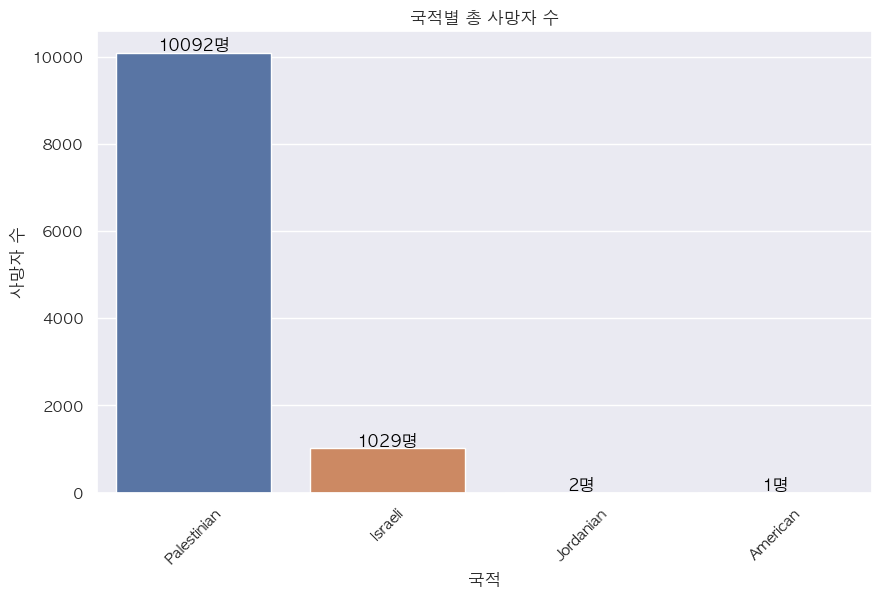

In [75]:
# Q1. 어느 국가에서 더 많이 사망하였을까?
# 국적별 총 사망자 수를 카운트 플롯 작성
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'AppleGothic'

# countplot을 사용하여 국적별 사망자 수를 시각화합니다.
ax = sns.countplot(x='citizenship', data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}명', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
    
# 그래프에 제목과 레이블 추가
plt.title("국적별 총 사망자 수")
plt.xlabel("국적")
plt.ylabel("사망자 수")

# x 축 레이블을 45도 기울임
plt.xticks(rotation=45)

# 그래프를 표시
plt.show()

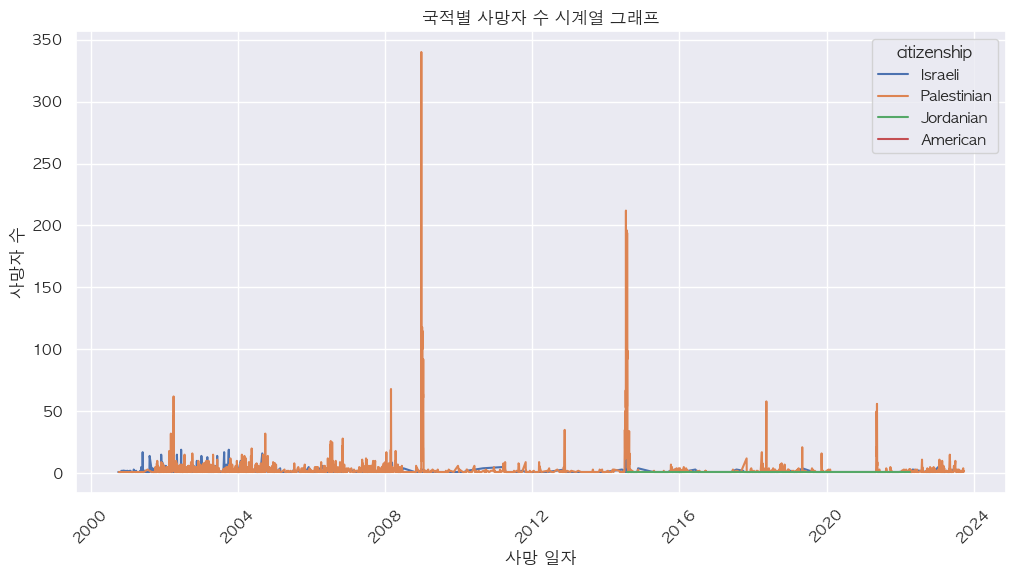

In [68]:
# Q2. 몇년도에 
# 데이터를 날짜 형식으로 변환
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

# 데이터를 국적에 따라 그룹화하고 사망자 수를 계산
death_by_nationality = df.groupby(['date_of_death', 'citizenship']).size().reset_index(name='사망자 수')

# 시계열 데이터 시각화
sns.set(style="darkgrid")
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(12, 6))
sns.lineplot(x="date_of_death", y="사망자 수", hue="citizenship", data=death_by_nationality)

plt.title("국적별 사망자 수 시계열 그래프")
plt.xlabel("사망 일자")
plt.ylabel("사망자 수")

# 그래프를 표시
plt.xticks(rotation=45)
plt.show()

# 3. Data Preprocessing

# 4. Data Analysis

# 5. Data Visualization

# 6. Conclusion and Summary